In [1]:
import pandas as pd
import lib.utils_analysis as utils

In [2]:
#read the clustering results and the deaggreated user logs to perform additional analysis of non-clustering features
deaggregated =pd.read_csv("./data/cluster_sample.csv", sep=';')
cluster_results =pd.read_csv("./data/cluster_results.csv", sep=';')
merged_df = pd.merge(deaggregated, cluster_results[['idVisit', 'cluster', 'category']], on='idVisit', how='left')

In [3]:
#stats regarding the distribution of users across clusters
utils.user_stats(cluster_results)

Overall proportion of unique users: 0.55
Proportion of unique users in cluster 0: 0.42
Proportion of unique users in cluster 2: 0.06
Proportion of unique users in cluster 3: 0.07
Proportion of unique users in cluster 4: 0.06
Proportion of unique users in cluster 1: 0.06
Proportion of unique users in cluster 5: 0.02
Proportion of users with visits in only one cluster: 0.83
Proportion of users with multiple visits in only one cluster: 0.09
Proportion of users appearing in multiple clusters: 0.17


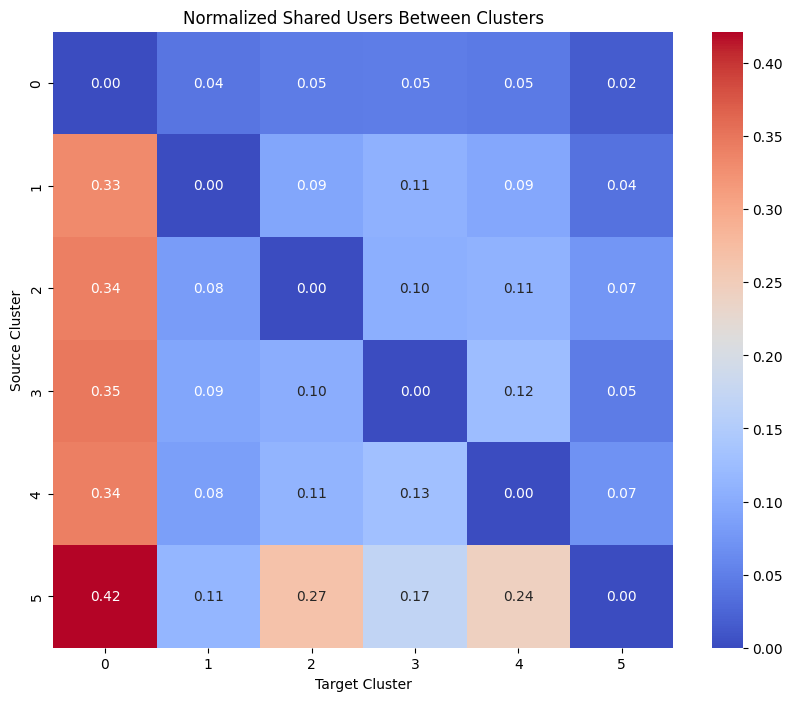

In [4]:
#proportions of shared users between clusters normalized by total users of source cluster
utils.shared_users(cluster_results)

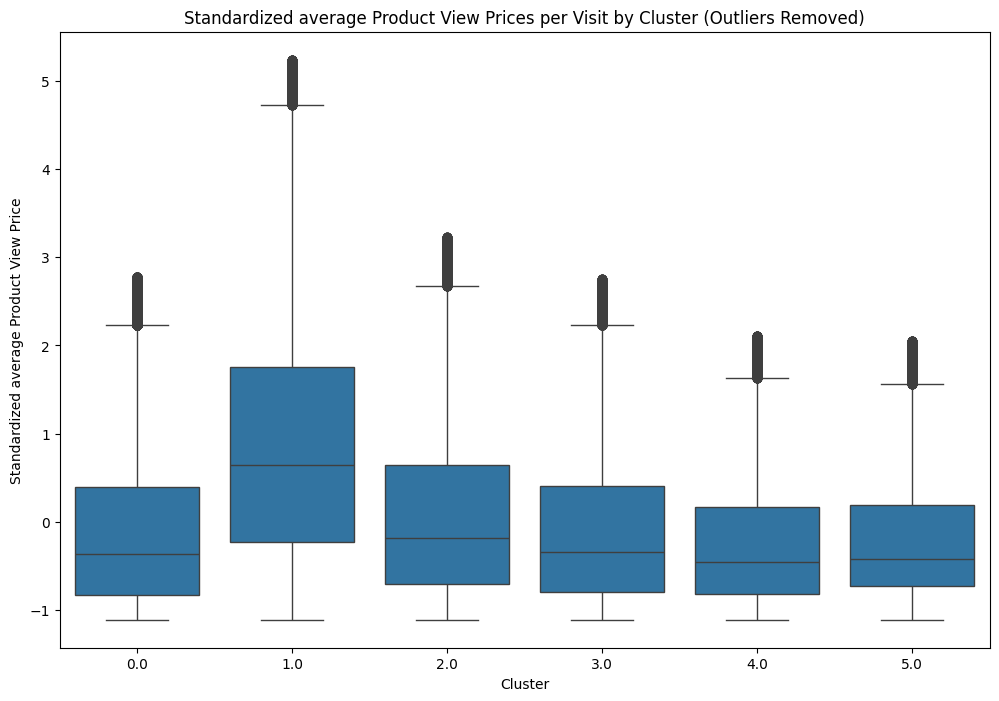

In [5]:
utils.mean_price(merged_df)

In [6]:
cluster0 = cluster_results.loc[cluster_results['cluster'] == 0]
cluster1 = cluster_results.loc[cluster_results['cluster'] == 1]
cluster2 = cluster_results.loc[cluster_results['cluster'] == 2]
cluster3 = cluster_results.loc[cluster_results['cluster'] == 3]
cluster4 = cluster_results.loc[cluster_results['cluster'] == 4]
cluster5 = cluster_results.loc[cluster_results['cluster'] == 5]

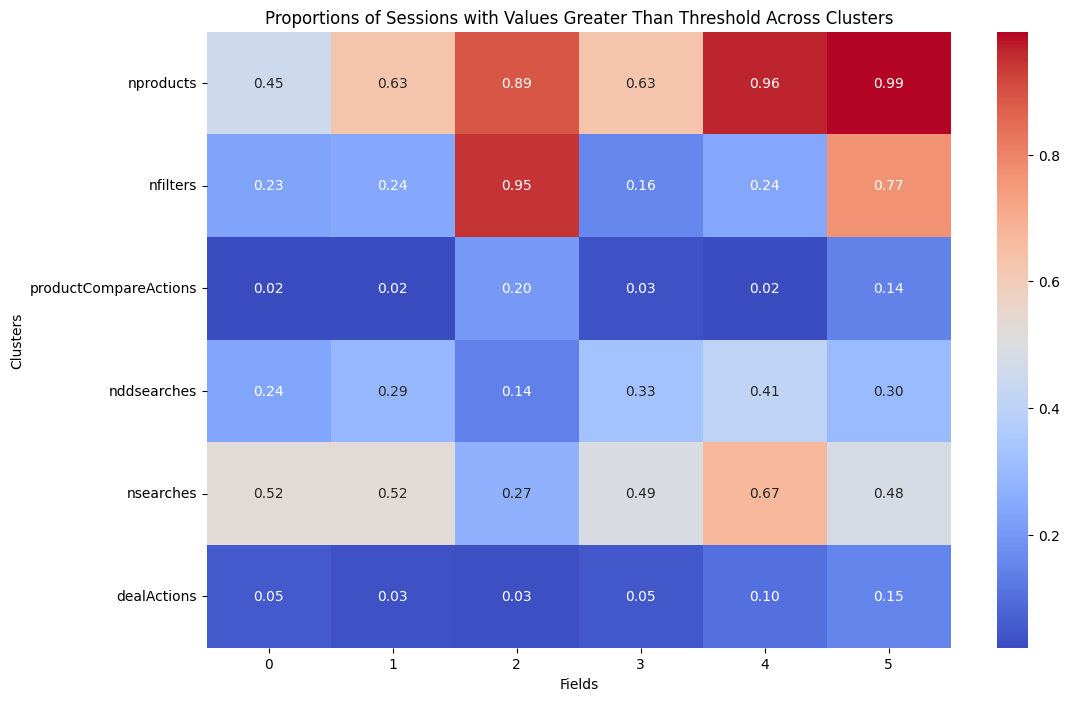

In [7]:
cluster_dfs = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5]
clusters = range(6)  
fields = ['nproducts', 'nfilters', 'productCompareActions', 'nddsearches', 'nsearches', 'dealActions']

#plot the proportions of values greater than a certain threshold for each cluster
#for every feature other than nproducts this indicates a value greater than zero and for nproducts the threshold is greater than one
utils.plot_combined_proportions(cluster_dfs, clusters, fields)

## List of verification questions

- **Q1a:** How many sessions involve products priced above a certain threshold (500 Euro)?
- **Q1b:** How many sessions involve products priced below a certain threshold (100 Euro)?
- **Q2:** How many sessions last less than five minutes?
- **Q3:** How many sessions involve viewing fewer than 3 products but still generate at least one lead?
- **Q4a:** How many sessions involve using filters at least five times and generate a lead?
- **Q4b:** How many sessions involve using filters at least two times?
- **Q4c:** How many sessions involve using no filters?
- **Q5a:** How many sessions involve using search at least five times and generate a lead?
- **Q5b:** How many sessions involve using search at least two times?
- **Q5c:** How many sessions involve using no search?
- **Q6:** How many sessions view more than five products?
- **Q7a:** How many sessions view more than five products?
- **Q7b:** How many sessions view more than five products but do not generate a lead?
- **Q8:** How many sessions last more than ten minutes but involve viewing fewer than five products?
- **Q9a:** How many sessions last more than ten minutes and do not lead to leads?
- **Q9b:** How many sessions last more than twenty minutes and do not lead to leads?
- **Q10:** How many sessions browse more than three third-level categories?
- **Q11:** How many sessions browse more than two second-level categories?
- **Q12:** How many sessions generate more than one lead?

In [8]:
#proportion of sessions that meet the constraints of the verification questions
result = utils.calculate_cluster_verification_proportions(cluster_results)
display(result)

,0,1,2,3,4,5
Q1a,0.02,0.77,0.03,0.07,0.02,0.04
Q1b,0.87,0.05,0.79,0.74,0.84,0.79
Q2,0.76,0.35,0.11,0.00,0.23,0.02
Q3,0.19,0.65,0.06,0.25,0.04,0.00
Q4a,0.00,0.05,0.27,0.01,0.01,0.32
Q4b,0.16,0.18,0.92,0.10,0.17,0.73
Q4c,0.77,0.76,0.05,0.84,0.76,0.23
Q5a,0.02,0.11,0.02,0.03,0.17,0.12
Q5b,0.37,0.37,0.15,0.31,0.58,0.38
Q5c,0.48,0.48,0.73,0.51,0.33,0.52


- **Q1:** How many sessions involve leads priced above 500 Euro?
- **Q2:** How many sessions last less than five minutes?
- **Q3:** How many sessions involve viewing fewer than 3 products but still generate at least one lead?
- **Q4:** How many sessions involve using filters at least three times generate a lead?
- **Q5:** How many sessions involve using search at least three times and generate a lead?
- **Q6:** How many sessions view more than five products?
- **Q7:** How many sessions last more than ten minutes but involve viewing fewer than five products?
- **Q8:** How many sessions last more than ten minutes and do not generate a lead?
- **Q9:** How many sessions browse more than three third-level categories?

In [9]:
#proportion of sessions that meet the constraints of the verification questions reported in the paper
reported = utils.calculate_reported_questions(cluster_results)
display(reported)

,0,1,2,3,4,5
Q1,0.02,0.77,0.03,0.07,0.02,0.04
Q2,0.76,0.35,0.11,0.00,0.23,0.02
Q3,0.19,0.65,0.06,0.25,0.04,0.00
Q4,0.02,0.13,0.34,0.03,0.04,0.37
Q5,0.05,0.24,0.04,0.08,0.24,0.18
Q6,0.01,0.06,0.34,0.03,0.31,0.90
Q7,0.08,0.34,0.32,0.93,0.26,0.05
Q8,0.06,0.00,0.36,0.58,0.29,0.40
Q9,0.00,0.00,0.01,0.01,0.26,0.63
